# Example Using Emergenet
- Compares risk assesment from IRAT and risk assessment using Emergenet
- Analyzes HA and NA subsegments of A/Ohio/13/2017 (H3N2), which was evaluated by IRAT on July 2019
- Data sources:
    - IRAT (CDC): https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm#H1N2variant
    - GISAID: https://platform.epicov.org/epi3/cfrontend#586f5f
- Collected Human HA and NA strains within one year prior to IRAT analysis (July 1, 2018 - June 30, 2019)

In [1]:
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
from Bio import SeqIO

from emergenet.emergenet import Enet, save_model, load_model

DATA_DIR = 'example_data/'

## HA Emergence Risk Score

In [2]:
# initialize the Enet with a sequence not currently circulating
enet_ha = Enet(seq=DATA_DIR+'ha_target_sequence.fasta', seq_trunc_length=550, random_state=42)
print(enet_ha.seq_metadata)
print(enet_ha.seq)
print('Length of target sequence:', len(enet_ha.seq))

A/Ohio/13/2017|A_/_H3N2|$SEGMENT_NAME|2017-07-14|EPI1056653|
MKTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSFSTGEICNSPYQILDGENCTLIDALLGDPQCDGFQNNKWDLFVERSKAHSNCYPYDVPDYASLRSLVASSGTLEFNNESFNWTGVTQDGASSSCKRRSSNSFFSRLNWLTHLNFKYPALEVTMPNNEQFDKLYIWGVHHPATDKDQISLYAQAAGRIIVSTKRNQQAVIPNIGSRPRVRDIPSRISIYWTIVRPGDILLINSTGNLIAPRGYFKIRSGKSSIMRSDAPIGKCNSACITPNGSIPNDKPFQNVNRITYGACPRYVKQNTLKLATGMRNIPEKQTRGIFGAIAGFIENGWEGMVDGWYGFRHQNSEGRGQAADLKSTQAAIDQINGKLNRLIGKTNEKFHQIEKEFSDVEGRIQDLEKYVEDTKIDLWSYNAELLVALENQHTIDLTDSEMNKLFEKTKKQLRENAEDMGNGCFKIYHKCDNACIGSIRNGTYDHDVYRNEALNNRFQIKGVELKSEYKDWILWISFAISCFLLCVALLGFIMWACQKGNIKCNICI
Length of target sequence: 566


In [3]:
# load fasta data
df_ha = enet_ha.load_data(filepath=DATA_DIR+'ha_sequences.fasta', outfile=DATA_DIR+'ha_sequences.csv')
print('Number of sequences:', len(df_ha))
df_ha.head()

Number of sequences: 12389


,id,sequence
0,A/Taiwan/79440/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, K, T, I, I, A, L, S, Y, I, L, C, L, V, F, ..."
1,A/Taiwan/79440/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, K, T, I, I, A, L, S, Y, I, L, C, L, V, F, ..."
2,A/Taiwan/80749/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, K, T, I, I, A, L, S, Y, I, L, C, L, V, F, ..."
3,A/Taiwan/79429/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, K, T, I, I, A, L, S, Y, I, L, C, L, V, F, ..."
4,A/Myanmar/18M219/2018|A_/_H3N2|$SEGMENT_NAME|2...,"[M, K, T, I, I, A, L, S, Y, I, L, C, L, V, F, ..."


In [5]:
%%time
# train qnet (automatically includes target sequence with df sequences)
qnet_ha = enet_ha.train(seq_df=df_ha, sample_size=1000, n_jobs=1)

CPU times: user 2min 35s, sys: 203 ms, total: 2min 35s
Wall time: 2min 36s


In [6]:
# save qnet
save_model(qnet=qnet_ha, outfile=DATA_DIR+'ha_qnet.joblib')

In [7]:
# load qnet
qnet_ha = load_model(filepath=DATA_DIR+'ha_qnet.joblib')

In [9]:
%%time
# compute emergence risk score
emergence_risk_score_ha = enet_ha.emergence_risk(seq_df=df_ha, qnet=qnet_ha, sample_size=1000)
print(emergence_risk_score_ha)

0.021191122262609143
CPU times: user 31.6 s, sys: 7.75 ms, total: 31.6 s
Wall time: 31.8 s


In [ ]:
# what is sample size?
# can we incorportae membership degree?
# should be able to set the target sequence separately.. add a function
# 

In [19]:
from quasinet import qnet
mem=[qnet.membership_degree(seq1[:550], qnet_ha) for seq1 in df_ha.sequence.values]


(array([ 317., 1442., 2198.,  271.,  213.,  541., 1213.,  437.,  332.,
         421.]),
 array([-17.99190211, -16.89495472, -15.79800733, -14.70105994,
        -13.60411255, -12.50716516, -11.41021777, -10.31327038,
         -9.21632299,  -8.11937561,  -7.02242822]),
 <BarContainer object of 10 artists>)

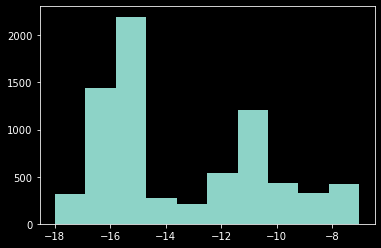

In [34]:
mem=np.array(mem)
import pylab as plt
plt.style.use('dark_background')
plt.hist(mem[mem>-18],bins=10)

In [10]:
emergence_risk_score_ha

0.021191122262609143

## NA Emergence Risk Score

In [50]:
# initialize the Enet with a sequence not currently circulating
enet_na = Enet(seq=DATA_DIR+'na_target_sequence.fasta', seq_trunc_length=449, random_state=42)
print(enet_na.seq_metadata)
print(enet_na.seq)
print('Length of target sequence:', len(enet_na.seq))

A/Ohio/13/2017|A_/_H3N2|$SEGMENT_NAME|2017-07-14|EPI1056652|
MNPNQKIITIGSVSLIIATICFLMQIAILVTTITLHFKQHNCDSSPNNHVMFCEPTIIERNKTEIVYLTNTTVEKEICPKPTEYRNWSKPQCNITGFAPFSKDNSIRLSAGGDIWVTREPYVSCDQDKCYQFALGQGTTLNNGHSNDTVHDRTPYRTLLMNELGVPFHLGTRQVCIAWSSSSCHDGKAWLHVCITGDDKNATASLIYNGRLVDSIGSWSKNILRTQESECVCINGTCTVVMTDGSASGKADTKILFIEEGKIIHISTLSGSAQHVEECSCYPRYSGVRCVCRDNWKGSNRPIVDINVKDYSTVSSYICSGLVGDTPRKNDSFSSSNCLDPNNEEGGHGVKGWAFDDGNDLWMGRTISEKSRLGYETFKVVKGWSEPNSKLQSNRQVIVDRGNRSGYSGIFSIEGKNCINRCFYVELIRGRKEETKVLWTSNSIVVFCGTSGTYGTGSWPDGADINLMPI
Length of target sequence: 469


In [51]:
# load fasta data
df_na = enet_na.load_data(filepath=DATA_DIR+'na_sequences.fasta', outfile=DATA_DIR+'na_sequences.csv')
print('Number of sequences:', len(df_na))
df_na.head()

Number of sequences: 12388


,id,sequence
0,A/Taiwan/79440/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, N, P, N, Q, K, I, I, T, I, G, S, V, S, L, ..."
1,A/Taiwan/79440/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, N, P, N, Q, K, I, I, T, I, G, S, V, S, L, ..."
2,A/Taiwan/80749/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, N, P, N, Q, K, I, I, T, I, G, S, V, S, L, ..."
3,A/Taiwan/79429/2018|A_/_H3N2|$SEGMENT_NAME|201...,"[M, N, P, N, Q, K, I, I, T, I, G, S, V, S, L, ..."
4,A/Myanmar/18M219/2018|A_/_H3N2|$SEGMENT_NAME|2...,"[M, N, P, N, Q, K, I, I, T, I, G, S, V, S, L, ..."


In [52]:
%%time
# train qnet (automatically includes target sequence with df sequences)
qnet_na = enet_na.train(seq_df=df_na, sample_size=1000, n_jobs=1)

CPU times: user 2min 3s, sys: 290 ms, total: 2min 4s
Wall time: 2min 4s


In [53]:
# save qnet
save_model(qnet=qnet_na, outfile=DATA_DIR+'na_qnet.joblib')

In [8]:
# load qnet
qnet_na = load_model(filepath=DATA_DIR+'na_qnet.joblib')

FileNotFoundError: [Errno 2] No such file or directory: 'example_data/na_qnet.joblib'

In [55]:
%%time
# compute emergence risk score
emergence_risk_score_na = enet_na.emergence_risk(seq_df=df_na, qnet=qnet_na, sample_size=1000)
print(emergence_risk_score_na)

0.03134153156313295
CPU times: user 31.8 s, sys: 17 ms, total: 31.8 s
Wall time: 31.8 s


## Average Emergence Risk Score
- Emergence risk scores should match values in SI-Table 16 (with some variation due to sampling differences in training Qnet)

In [56]:
# compute average emergence risk (recall we used 1000 samples in each)
emergence_risk_score_avg = (emergence_risk_score_ha * 1000 + emergence_risk_score_na * 1000)/2000
print('Emergenet potential emergence estimate:', round(emergence_risk_score_avg, 6))
print('IRAT potential emergence estimate: 6.6')

Emergenet potential emergence estimate: 0.026266
IRAT potential emergence estimate: 6.6
